In [38]:
import joblib
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
data = {
    'Baseline': joblib.load("checkpoints/baseline/train/all_suff_comp_pred_sst_dev_data_spaced.joblib"),
}

In [42]:
data['Baseline'][0]['attentions'].keys()

dict_keys([0.01, 0.2, 0.4, 0.6, 0.8, 1.0])

In [52]:
techniques = ['attentions', 'rollout', 'IxG', 'alti_aggregated', 'decompx', 'decompx_classifier', 'random']
techniques_map = {
    'attentions': 'Att',
    'rollout': 'AttR',
    'IxG': 'IxG',
    'alti_aggregated': 'ALTI',
    'decompx': 'DX',
    'decompx_classifier': 'DX-C',
    'random': 'Random',
}
approaches = list(data.keys())
values = list(data['Baseline'][0]['attentions'].keys())

v = 0

scores = {'sufficiency': {}, 'comprehensiveness': {}}
for metric in scores.keys():
    for approach in approaches:
        scores[metric][approach] = {}
        for technique in techniques:
            scores[metric][approach][techniques_map[technique]] = []
            for k in values:
                scores[metric][approach][techniques_map[technique]].append(np.mean(data[approach][v][technique][k][metric].tolist()))

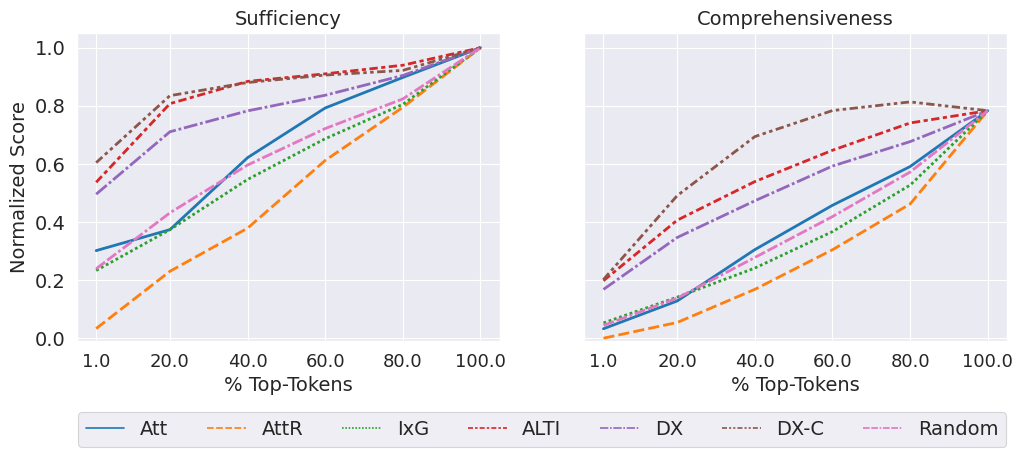

In [64]:
sns.set_context("paper", rc={"font.size": 16, "axes.titlesize": 14, "axes.labelsize": 14, "xtick.labelsize": 13, "ytick.labelsize": 14})

sns.set_style('darkgrid')

styles = ['-', '--', '-.', ':', 'None']

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

for i, metric in enumerate(scores.keys()):
    df = pd.DataFrame(scores[metric]['Baseline'])
    df['% Tokens'] = values
    df_long = pd.melt(df, id_vars='% Tokens', value_vars=list(techniques_map.values()), var_name='Approach', value_name=f'{metric.capitalize()} Score')
    lp = sns.lineplot(data=df_long,
        x='% Tokens',
        y=f'{metric.capitalize()} Score',
        hue='Approach',
        style='Approach',
        linewidth=2.0,
        ax=axs[i]
    )
    lp.set_title(f'{metric.capitalize()}')
    lp.set_xticks(values, rotation=90)
    axs[i].tick_params(axis='x', labelrotation=0)
    plt.ylim(-0.01,1.05)
    lp.legend().set_visible(False)

    lp.set_xticklabels([100*v for v in values])

    # Change axis labels
    lp.set_ylabel('Normalized Score')
    lp.set_xlabel('% Top-Tokens')

plt.legend(loc='upper center', prop={'size': 14}, bbox_to_anchor=(-0.1, -0.20), ncol=7)

fig.savefig(f"figures/suff_comp_baseline.pdf", dpi=300, bbox_inches='tight')